In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
import yfinance as yf

In [ ]:
# Download and prepare data
df = yf.download('AAPL', start='2020-01-01', end='2025-09-01', interval='1d', auto_adjust=True)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.538506,72.598884,71.292296,71.545882,135480400
2020-01-03,71.833298,72.594063,71.608692,71.765674,146322800
2020-01-06,72.405693,72.444336,70.703027,70.954203,118387200
2020-01-07,72.065163,72.671356,71.845385,72.415353,108872000
2020-01-08,73.224419,73.526310,71.768094,71.768094,132079200


In [ ]:
# We only need the 'Close' price
prices = df[['Close']].copy()

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

In [ ]:
# Create sequences
SEQ_LENGTH = 60
X, y = [], []
for i in range(SEQ_LENGTH, len(scaled_prices)):
    X.append(scaled_prices[i-SEQ_LENGTH:i, 0])
    y.append(scaled_prices[i, 0])
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [ ]:
# Split data (80% train, 20% test)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
# Build LSTM Model
model = Sequential([
    Input(shape=(SEQ_LENGTH, 1)),  # Explicit Input layer
    LSTM(50, return_sequences=False),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.1249
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0030
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0014
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 8.7571e-04
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 7.1879e-04
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 7.2231e-04
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 6.5662e-04
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.9048e-04
Epoch 9/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 7.3734e-04
Epoch 10/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 6.8898e-04
Epoch 11/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 6.2703e-04
Epoch 12/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 6.5001e-04
Epoch 13/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 5.6986e-04
Epoch 14/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.9711e-04
Epoch 15/20
35/35 ━━━━━━━━━

In [ ]:
# Make Predictions
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Evaluate Model
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
mae = mean_absolute_error(y_test_actual, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Root Mean Squared Error (RMSE): 7.38
Mean Absolute Error (MAE): 5.61


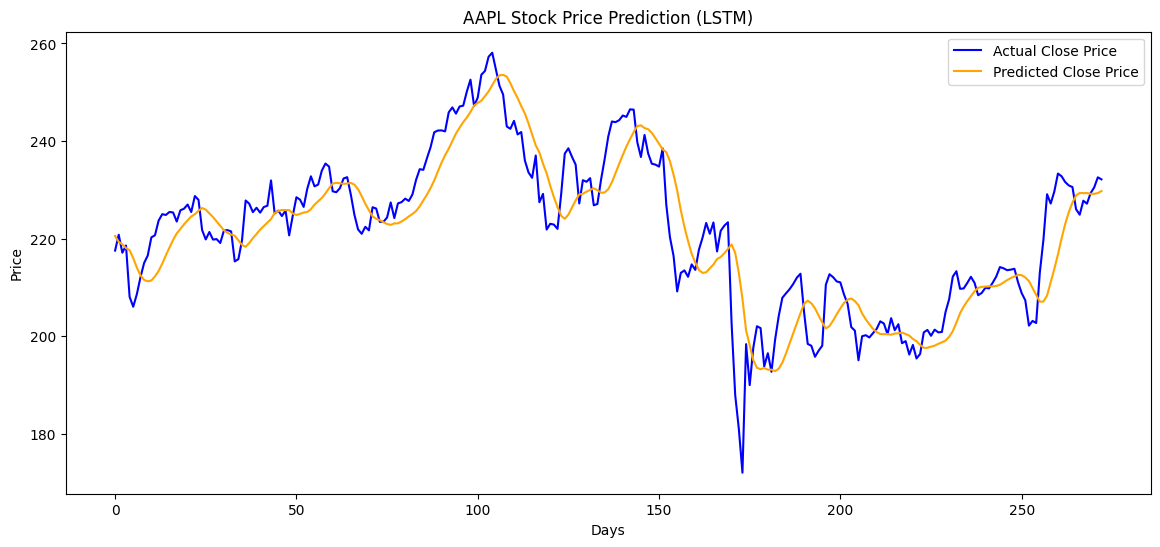

In [ ]:
# Plot
plt.figure(figsize=(14,6))
plt.plot(y_test_actual, color='blue', label='Actual Close Price')
plt.plot(y_pred, color='orange', label='Predicted Close Price')
plt.title('AAPL Stock Price Prediction (LSTM)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()